4.919885135995291e-08
150.0
['Hz0', 'Hzz']


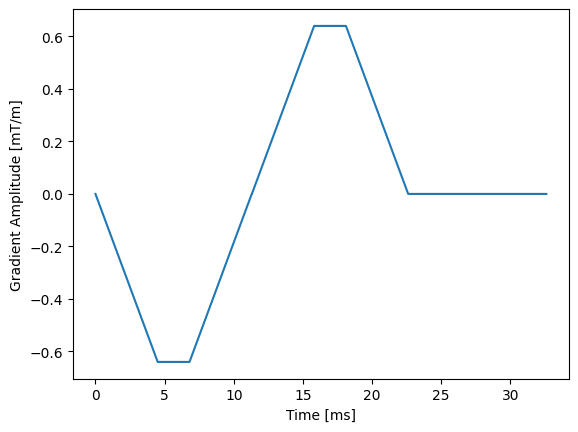

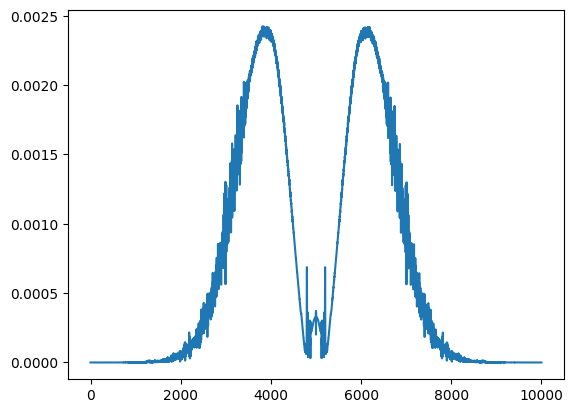

In [ ]:
# This script demonstrates the fluctuations in the B0 field owing to gradient imperfects.
# The script uses the GIRF response measured and estimated on a Siemens Vida Fit 3T Scanner.
#
# Author: dbe@stanford.edu
# Input: mloecher@stanford.edu
#
# Orignally written on May 24, 2025

import matplotlib.pyplot as plt
import numpy as np
from PAM_VENC2bipolar import PAM_VENC2bipolar

# MRI system specs
sys = {}  # Initialize an empty dictionary
sys['dt'] = 10e-6        # Gradient raster time [s]
sys['gmax'] = 45e-3      # Maximum gradient amplitude [T/m]
sys['smax'] = 10        # Maximum slewrate [T/m/s]
sys['gamma'] = 42.57e6   # Gyromagnetic ratio [Hz/T]

# Define the VENC for the simulation
venc = 150  # VENC in [cm/s]

# Define the bipolar gradient waveform
g_bipolar = PAM_VENC2bipolar(venc, sys)

# Zeropad after by 10ms (helps with convolution later) -- NOT SURE I NEED THIS...
N_bipolar = g_bipolar.size
N_zeropad = int(10e-3 / sys['dt'])
g_bipolar = np.hstack([g_bipolar, np.zeros(N_zeropad)])
time = np.arange(len(g_bipolar)) * sys['dt']

# Moment and VENC checks
M1 = np.sum(g_bipolar * time) * sys['dt']  # First moment [s·m/T]
venc_mps = np.pi / (sys['gamma'] * M1)     # [m/s]
venc_cms = venc_mps * 100                  # [cm/s]

print(M1)
print(venc_cms)

plt.figure()
plt.plot(1000*time, 1000*g_bipolar)  # Plot in [ms] and [mT/m]
plt.ylabel('Gradient Amplitude [mT/m]')
plt.xlabel('Time [ms]')

#PAM_get_grif_field_response
npz = np.load('./girf_example/example_GIRF.npz')  # Load the example GIRF

print(npz.files)

Hz0 = npz['Hz0']  # GTF z->0
Hzz = npz['Hzz']  # GTF z->z

hz0 = np.fft.fftshift(np.fft.ifft(Hz0))

plt.figure()
plt.plot(np.abs(Hz0))

plt.figure()
plt.plot(np.abs(hz0))
